In [1]:
# Os dados importados limpos se referem as notas desconsiderando os casos em que ha zero em alguma das areas de conhecimento,
# com excessao da redacao, que pode ter sido zero

import pandas as pd
df = pd.read_csv("../../Data/dados_enem_2022_limpo.csv")

df

,NU_INSCRICAO,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ESCOLA,NO_MUNICIPIO_ESC,SG_UF_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,NU_NOTA_REDACAO,NU_IDADE,NOTA_MEDIA
0,2.100570e+11,F,Solteiro(a),Parda,Brasileiro(a),Publica,Aracati,CE,436.7,420.0,512.6,430.4,Espanhol,560.0,20.0,471.94
1,2.100560e+11,F,Solteiro(a),Branca,Brasileiro(a),Publica,São Paulo,SP,819.5,684.9,657.8,905.5,Ingles,900.0,18.0,793.54
2,2.100560e+11,M,Solteiro(a),Parda,Brasileiro(a),Publica,Goianésia,GO,442.4,579.2,582.7,551.9,Ingles,740.0,17.0,579.24
3,2.100550e+11,F,Solteiro(a),Parda,Brasileiro(a),Publica,Santarém,PA,461.4,485.9,448.9,433.6,Espanhol,520.0,18.0,469.96
4,2.100560e+11,M,Solteiro(a),Branca,Brasileiro(a),Publica,Teresópolis,RJ,427.8,485.0,557.5,438.0,Espanhol,540.0,18.0,489.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191308,2.100550e+11,F,Solteiro(a),Parda,Brasileiro(a),Publica,Maranguape,CE,496.8,580.1,575.9,545.9,Espanhol,840.0,18.0,607.74
191309,2.100580e+11,F,Solteiro(a),Parda,Brasileiro(a),Publica,Fortaleza,CE,388.8,510.0,488.0,502.1,Espanhol,600.0,17.0,497.78
191310,2.100560e+11,F,Solteiro(a),Preta,Brasileiro(a),Publica,Jaguaribe,CE,445.3,516.7,571.6,500.4,Espanhol,700.0,18.0,546.80
191311,2.100570e+11,F,Solteiro(a),Parda,Brasileiro(a),Publica,Morrinhos,CE,408.0,445.8,419.8,406.1,Espanhol,720.0,18.0,479.94


In [2]:
import sys
print(sys.executable)  # Vai mostrar o caminho REAL do Python que o notebook está usando

/home/pietro/Documents/MIND-UFPR/Nota1000/venv/bin/python


In [3]:
# Importa bibliotecas que podem ser uteis e dropa dados nao desejados

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

dados_dropados = [
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_MT',
    'NU_NOTA_REDACAO'
]

df = df.drop(dados_dropados, axis=1)
print(df['TP_ESTADO_CIVIL'].value_counts())

labels_que_queremos = [
    'CASADO',
    'SOLTEIRO',
    'DIVORCIADO',
    'VIUVO',
    'N_INF'
]

labels_reais = [
    'Casado(a)',
    'Solteiro(a)',
    'Divorciado(a)',
    'Viuvo(a)',
    'Nao informado'
]

#for i in range (5):
#    df_temp[labels_que_queremos[i]] = df['TP_ESTADO_CIVIL'] == labels_reais[i]

TP_ESTADO_CIVIL
Solteiro(a)       183816
Nao informado       5373
Divordicado(a)      1230
Casado(a)            860
Viuvo(a)              34
Name: count, dtype: int64


In [4]:
# Aumenta o numero de colunas para cada atributo

import pandas as pd 

df = pd.get_dummies(df, columns = ['TP_ESTADO_CIVIL', 'TP_SEXO', 'TP_COR_RACA', 'TP_ESCOLA', 'TP_LINGUA'], dtype= int)


In [5]:
# Dicionario de mapeamento UF -> Região
uf_para_regiao = {
    # Norte
    'AC': 'Norte', 'AP': 'Norte', 'AM': 'Norte', 'PA': 'Norte', 
    'RO': 'Norte', 'RR': 'Norte', 'TO': 'Norte',
    
    # Nordeste
    'AL': 'Nordeste', 'BA': 'Nordeste', 'CE': 'Nordeste', 'MA': 'Nordeste', 
    'PB': 'Nordeste', 'PE': 'Nordeste', 'PI': 'Nordeste', 'RN': 'Nordeste', 'SE': 'Nordeste',
    
    # Centro-Oeste
    'DF': 'Centro-Oeste', 'GO': 'Centro-Oeste', 'MT': 'Centro-Oeste', 'MS': 'Centro-Oeste',
    
    # Sudeste
    'ES': 'Sudeste', 'MG': 'Sudeste', 'RJ': 'Sudeste', 'SP': 'Sudeste',
    
    # Sul
    'PR': 'Sul', 'RS': 'Sul', 'SC': 'Sul'
}

# Criar nova coluna 'REGIAO_ESC' baseada em 'SG_UF_ESC'
df['REGIAO_ESC'] = df['SG_UF_ESC'].map(uf_para_regiao)

df.drop('SG_UF_ESC', axis=1, inplace=True)
df.drop('NO_MUNICIPIO_ESC', axis=1, inplace=True)

# Verificar valores nulos (caso haja UFs não mapeadas ou missing)
print(df['REGIAO_ESC'].isnull().sum()) 

df

0


,NU_INSCRICAO,TP_NACIONALIDADE,NU_IDADE,NOTA_MEDIA,TP_ESTADO_CIVIL_Casado(a),TP_ESTADO_CIVIL_Divordicado(a),TP_ESTADO_CIVIL_Nao informado,TP_ESTADO_CIVIL_Solteiro(a),TP_ESTADO_CIVIL_Viuvo(a),TP_SEXO_F,...,TP_COR_RACA_Branca,TP_COR_RACA_Indigena,TP_COR_RACA_Nao declarado,TP_COR_RACA_Parda,TP_COR_RACA_Preta,TP_ESCOLA_Privada,TP_ESCOLA_Publica,TP_LINGUA_Espanhol,TP_LINGUA_Ingles,REGIAO_ESC
0,2.100570e+11,Brasileiro(a),20.0,471.94,0,0,0,1,0,1,...,0,0,0,1,0,0,1,1,0,Nordeste
1,2.100560e+11,Brasileiro(a),18.0,793.54,0,0,0,1,0,1,...,1,0,0,0,0,0,1,0,1,Sudeste
2,2.100560e+11,Brasileiro(a),17.0,579.24,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,Centro-Oeste
3,2.100550e+11,Brasileiro(a),18.0,469.96,0,0,0,1,0,1,...,0,0,0,1,0,0,1,1,0,Norte
4,2.100560e+11,Brasileiro(a),18.0,489.66,0,0,0,1,0,0,...,1,0,0,0,0,0,1,1,0,Sudeste
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191308,2.100550e+11,Brasileiro(a),18.0,607.74,0,0,0,1,0,1,...,0,0,0,1,0,0,1,1,0,Nordeste
191309,2.100580e+11,Brasileiro(a),17.0,497.78,0,0,0,1,0,1,...,0,0,0,1,0,0,1,1,0,Nordeste
191310,2.100560e+11,Brasileiro(a),18.0,546.80,0,0,0,1,0,1,...,0,0,0,0,1,0,1,1,0,Nordeste
191311,2.100570e+11,Brasileiro(a),18.0,479.94,0,0,0,1,0,1,...,0,0,0,1,0,0,1,1,0,Nordeste


In [6]:
from sklearn.preprocessing import MinMaxScaler

# Variáveis numéricas a serem normalizadas
numerical_features = ['NU_IDADE', 'NOTA_MEDIA']

# Aplicar normalizacao
scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

df.drop('NU_INSCRICAO', axis=1, inplace=True)

In [7]:
# Vamos ver se a nacionalidade importa (quantos estrangeiros fazendo a prova)

# Contagem de participantes por nacionalidade
print(df['TP_NACIONALIDADE'].value_counts())

# Proporção de não brasileiros
total = len(df)
nao_brasileiros = df[df['TP_NACIONALIDADE'] != 'Brasileiro(a)'].shape[0]
print(f"\nProporção de não brasileiros: {nao_brasileiros / total:.2%}")

TP_NACIONALIDADE
Brasileiro(a)                                    186781
Brasileiro(a) Naturalizado(a)                      3763
Brasileiro(a) Nato(a), nascido(a) no exterior       395
Estrangeiro(a)                                      276
Nao informado                                        98
Name: count, dtype: int64

Proporção de não brasileiros: 2.37%


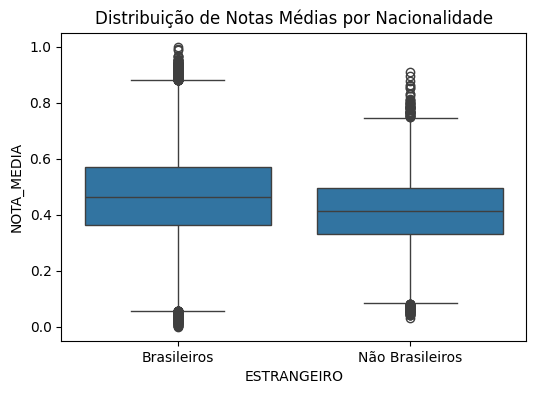

In [8]:
# Vamos comparar as notas das duas populações

import matplotlib.pyplot as plt
import seaborn as sns

# Criar uma coluna binária para nacionalidade
df['ESTRANGEIRO'] = (df['TP_NACIONALIDADE'] != 'Brasileiro(a)').astype(int)

# Boxplot das notas médias por grupo
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='ESTRANGEIRO', y='NOTA_MEDIA')
plt.xticks([0, 1], ['Brasileiros', 'Não Brasileiros'])
plt.title("Distribuição de Notas Médias por Nacionalidade")
plt.show()

In [9]:
# Agrupar por subcategorias de nacionalidade e calcular notas médias
analise_nacionalidade = df.groupby('TP_NACIONALIDADE')['NOTA_MEDIA'].agg(['mean', 'std', 'count'])
print(analise_nacionalidade.sort_values(by='mean', ascending=False))

                                                   mean       std   count
TP_NACIONALIDADE                                                         
Brasileiro(a) Nato(a), nascido(a) no exterior  0.504823  0.171514     395
Brasileiro(a)                                  0.466041  0.153293  186781
Estrangeiro(a)                                 0.434259  0.148284     276
Brasileiro(a) Naturalizado(a)                  0.406144  0.127081    3763
Nao informado                                  0.309935  0.130548      98


In [10]:
# Normalizando a coluna das regiões

df = pd.get_dummies(df, columns=['REGIAO_ESC'], prefix='REGIAO', dtype=int)

print([col for col in df.columns if 'REGIAO_' in col])


['REGIAO_Centro-Oeste', 'REGIAO_Nordeste', 'REGIAO_Norte', 'REGIAO_Sudeste', 'REGIAO_Sul']


In [11]:
df.drop('TP_NACIONALIDADE', axis=1, inplace=True)

In [12]:
# Vamos renomear as colunas para que haja um padrão

# Dicionário de renomeação
new_columns = {
    'NU_IDADE': 'IDADE_NORM',
    'NOTA_MEDIA': 'NOTA_MEDIA_NORM',
    'TP_ESTADO_CIVIL_Casado(a)': 'ESTADO_CIVIL_CASADO',
    'TP_ESTADO_CIVIL_Divordicado(a)': 'ESTADO_CIVIL_DIVORCIADO',
    'TP_ESTADO_CIVIL_Nao informado': 'ESTADO_CIVIL_NAO_INFORMADO',
    'TP_ESTADO_CIVIL_Solteiro(a)': 'ESTADO_CIVIL_SOLTEIRO',
    'TP_ESTADO_CIVIL_Viuvo(a)': 'ESTADO_CIVIL_VIUVO',
    'TP_SEXO_F': 'SEXO_FEMININO',
    'TP_SEXO_M': 'SEXO_MASCULINO',
    'TP_COR_RACA_Amarela': 'COR_RACA_AMARELA',
    'TP_COR_RACA_Branca': 'COR_RACA_BRANCA',
    'TP_COR_RACA_Indigena': 'COR_RACA_INDIGENA',
    'TP_COR_RACA_Nao declarado': 'COR_RACA_NAO_DECLARADO',
    'TP_COR_RACA_Parda': 'COR_RACA_PARDA',
    'TP_COR_RACA_Preta': 'COR_RACA_PRETA',
    'TP_ESCOLA_Privada': 'ESCOLA_PRIVADA',
    'TP_ESCOLA_Publica': 'ESCOLA_PUBLICA',
    'TP_LINGUA_Espanhol': 'LINGUA_ESPANHOL',
    'TP_LINGUA_Ingles': 'LINGUA_INGLES',
    'ESTRANGEIRO': 'ESTRANGEIRO',
    'REGIAO_Centro-Oeste': 'REGIAO_CENTRO_OESTE',
    'REGIAO_Nordeste': 'REGIAO_NORDESTE',
    'REGIAO_Norte': 'REGIAO_NORTE',
    'REGIAO_Sudeste': 'REGIAO_SUDESTE',
    'REGIAO_Sul': 'REGIAO_SUL'
}

df = df.rename(columns=new_columns)

print(df.columns.tolist())
print(len(df.columns))

['IDADE_NORM', 'NOTA_MEDIA_NORM', 'ESTADO_CIVIL_CASADO', 'ESTADO_CIVIL_DIVORCIADO', 'ESTADO_CIVIL_NAO_INFORMADO', 'ESTADO_CIVIL_SOLTEIRO', 'ESTADO_CIVIL_VIUVO', 'SEXO_FEMININO', 'SEXO_MASCULINO', 'COR_RACA_AMARELA', 'COR_RACA_BRANCA', 'COR_RACA_INDIGENA', 'COR_RACA_NAO_DECLARADO', 'COR_RACA_PARDA', 'COR_RACA_PRETA', 'ESCOLA_PRIVADA', 'ESCOLA_PUBLICA', 'LINGUA_ESPANHOL', 'LINGUA_INGLES', 'ESTRANGEIRO', 'REGIAO_CENTRO_OESTE', 'REGIAO_NORDESTE', 'REGIAO_NORTE', 'REGIAO_SUDESTE', 'REGIAO_SUL']
25


In [13]:
# Vamos verificar se está tudo realmente normalizado

print(df[['IDADE_NORM', 'NOTA_MEDIA_NORM']].describe().round(3))

for col in df.columns:
    if col not in ['IDADE_NORM', 'NOTA_MEDIA_NORM']:
        print(f"\n{col}: {df[col].unique()}")

       IDADE_NORM  NOTA_MEDIA_NORM
count  191313.000       191313.000
mean        0.033            0.465
std         0.030            0.153
min         0.000            0.000
25%         0.019            0.363
50%         0.037            0.463
75%         0.037            0.569
max         1.000            1.000

ESTADO_CIVIL_CASADO: [0 1]

ESTADO_CIVIL_DIVORCIADO: [0 1]

ESTADO_CIVIL_NAO_INFORMADO: [0 1]

ESTADO_CIVIL_SOLTEIRO: [1 0]

ESTADO_CIVIL_VIUVO: [0 1]

SEXO_FEMININO: [1 0]

SEXO_MASCULINO: [0 1]

COR_RACA_AMARELA: [0 1]

COR_RACA_BRANCA: [0 1]

COR_RACA_INDIGENA: [0 1]

COR_RACA_NAO_DECLARADO: [0 1]

COR_RACA_PARDA: [1 0]

COR_RACA_PRETA: [0 1]

ESCOLA_PRIVADA: [0 1]

ESCOLA_PUBLICA: [1 0]

LINGUA_ESPANHOL: [1 0]

LINGUA_INGLES: [0 1]

ESTRANGEIRO: [0 1]

REGIAO_CENTRO_OESTE: [0 1]

REGIAO_NORDESTE: [1 0]

REGIAO_NORTE: [0 1]

REGIAO_SUDESTE: [0 1]

REGIAO_SUL: [0 1]


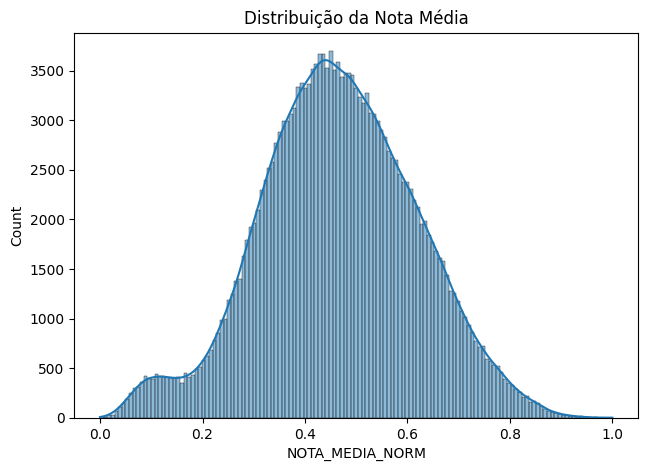

In [14]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['NOTA_MEDIA_NORM'], kde=True)
plt.title('Distribuição da Nota Média')
plt.show()


In [15]:
# Vamos dividir os dados para treinar e testar a rede

from sklearn.model_selection import train_test_split

X = df.drop('NOTA_MEDIA_NORM', axis=1) 
y = df['NOTA_MEDIA_NORM']  

# Dividindo em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificando os tamanhos dos conjuntos
print(f"Tamanho do conjunto de treino: {len(X_train)} amostras")
print(f"Tamanho do conjunto de teste: {len(X_test)} amostras")

Tamanho do conjunto de treino: 153050 amostras
Tamanho do conjunto de teste: 38263 amostras


In [16]:
import torch

# Convertendo para tensores PyTorch
X_train_tensor = torch.FloatTensor(X_train.values)
y_train_tensor = torch.FloatTensor(y_train.values).view(-1, 1)
X_test_tensor = torch.FloatTensor(X_test.values)
y_test_tensor = torch.FloatTensor(y_test.values).view(-1, 1)

In [17]:
# Mudar para GPU caso esteja disponivel

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
X_train_tensor = X_train_tensor.to(device)
y_train_tensor = y_train_tensor.to(device)
X_test_tensor = X_test_tensor.to(device)
y_test_tensor = y_test_tensor.to(device)

In [18]:
# Vamos criar uma classe para o modelo de regressão

import torch.nn as nn

class ENEMRegressor(nn.Module):
    def __init__(self, input_size=25):
        super(ENEMRegressor, self).__init__()
        self.fc1 = nn.Linear(input_size, 16)
        self.fc2 = nn.Linear(16, 16)
        self.fc3 = nn.Linear(16, 1)  # Saída única para regressão
        
        # Inicialização Xavier para melhor convergência
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.zeros_(self.fc1.bias)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.zeros_(self.fc2.bias)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.zeros_(self.fc3.bias)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)  # Saída linear (sem ativação para regressão)
        return x

In [19]:
# Agora o modelo de classificação

class ENEMClassifier(nn.Module):
    def __init__(self, input_size=25, num_classes=5):
        super(ENEMClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 16)
        self.fc2 = nn.Linear(16, 16)
        self.fc3 = nn.Linear(16, num_classes)  # Saída com N classes
        
        # Inicialização Xavier
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.zeros_(self.fc1.bias)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.zeros_(self.fc2.bias)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.zeros_(self.fc3.bias)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.softmax(self.fc3(x), dim=1)  # Softmax para probabilidades
        return x

In [20]:
from torch.utils.data import TensorDataset, DataLoader

# Deve ser criado um dataset para utilzação dos batches
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [21]:
# Vamos definir uma funcao para treinar a rede de regressão

from sklearn.metrics import r2_score, mean_squared_error

def train_model(model, X_train, y_train, X_test, y_test, 
                device=None, batch_size=64, num_epochs=100, 
                patience=5, lr=0.001, verbose=True):
    """
    Treina um modelo PyTorch com dados de treino e validação
    
    Parâmetros:
    -----------
    model : nn.Module
        Modelo PyTorch a ser treinado
    X_train, y_train : array-like
        Dados de treino
    X_test, y_test : array-like
        Dados de validação
    device : torch.device
        Dispositivo (CPU/GPU) para treinamento
    batch_size : int
        Tamanho do batch
    num_epochs : int
        Número máximo de épocas
    patience : int
        Paciência para early stopping
    lr : float
        Taxa de aprendizado
    verbose : bool
        Se True, imprime progresso
    
    Retorna:
    --------
    tuple: (modelo treinado, dicionário com histórico de treino, melhores pesos)
    """
    
    # Configuração do dispositivo
    if device is None:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    model = model.to(device)
    
    # Converter dados para tensores e criar DataLoaders
    train_dataset = TensorDataset(
        torch.FloatTensor(X_train.values), 
        torch.FloatTensor(y_train.values).unsqueeze(1)
    )
    test_dataset = TensorDataset(
        torch.FloatTensor(X_test.values), 
        torch.FloatTensor(y_test.values).unsqueeze(1)
    )
    
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    
    # Configuração do treinamento
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=2)
    
    # Variáveis para acompanhamento
    history = {
        'train_loss': [],
        'test_loss': [],
        'r2': [],
        'best_weights': None,
        'best_epoch': 0
    }
    
    best_loss = float('inf')
    early_stop_counter = 0
    
    # Loop de treinamento
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        
        # Batch training
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item() * inputs.size(0)
        
        train_loss = train_loss / len(train_loader.dataset)
        
        # Validação
        model.eval()
        test_loss = 0.0
        all_preds = []
        all_labels = []
        
        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                test_loss += criterion(outputs, labels).item() * inputs.size(0)
                
                all_preds.append(outputs.cpu().numpy())
                all_labels.append(labels.cpu().numpy())
        
        test_loss = test_loss / len(test_loader.dataset)
        r2 = r2_score(np.concatenate(all_labels), np.concatenate(all_preds))
        
        # Atualizar histórico
        history['train_loss'].append(train_loss)
        history['test_loss'].append(test_loss)
        history['r2'].append(r2)
        
        # Atualizar melhor modelo
        if test_loss < best_loss:
            best_loss = test_loss
            history['best_weights'] = model.state_dict()
            history['best_epoch'] = epoch
            early_stop_counter = 0
        else:
            early_stop_counter += 1
        
        # Ajustar learning rate
        scheduler.step(test_loss)
        
        # Early stopping
        if early_stop_counter >= patience:
            if verbose:
                print(f"Early stopping at epoch {epoch+1}")
            break
        
        # Print progresso
        if verbose and (epoch % 5 == 0 or epoch == num_epochs-1):
            print(f"Epoch {epoch+1}/{num_epochs} | "
                  f"Train Loss: {train_loss:.4f} | "
                  f"Test Loss: {test_loss:.4f} | "
                  f"R²: {r2:.4f} | "
                  f"LR: {optimizer.param_groups[0]['lr']:.2e}")
    
    # Carregar melhores pesos
    model.load_state_dict(history['best_weights'])
    
    return model, history

In [22]:
# Define outros parametros

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = ENEMRegressor(input_size=X_train.shape[1]).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3)

In [ ]:
# Vamos de fato treinar a rede

import numpy as np

model = ENEMRegressor(input_size=X_train.shape[1])

trained_model, history = train_model(
    model=model,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    batch_size=128,
    num_epochs=100,
    patience=7,
    lr=0.001
)

NameError: name 'np' is not defined

In [ ]:
# Vamos ver os resultados

def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history['train_loss'], label='Train Loss')
    plt.plot(history['test_loss'], label='Validation Loss')
    plt.axvline(history['best_epoch'], color='r', linestyle='--', label='Best Model')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')
    
    plt.subplot(1, 2, 2)
    plt.plot(history['r2'], label='R² Score', color='g')
    plt.axvline(history['best_epoch'], color='r', linestyle='--', label='Best Model')
    plt.xlabel('Epoch')
    plt.ylabel('R² Score')
    plt.legend()
    plt.title('Model R² Score')
    
    plt.tight_layout()
    plt.show()

# Exemplo de uso:
# plot_training_history(history)